<a href="https://colab.research.google.com/github/Amana28/Deep-Learning/blob/master/Amana_06_AIT_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2023 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Using this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>

# Introduction to deep learning-based classification and evaluation
Today, we will dive into deep learning classifiers, with an ephasis on evaluation methods. 


## 1. Activation functions for classification
First, lets have an intuation about the output of the final layers' activation functions. For binary and multilabel classification we use sigmoid, for multiclass classification softmax.

In [1]:
import numpy as np

def sigmoid(x):
  return 1/(1 + np.exp(-x))

a = np.linspace(-5,5,40)
print(a)
print(sigmoid(a))

[-5.         -4.74358974 -4.48717949 -4.23076923 -3.97435897 -3.71794872
 -3.46153846 -3.20512821 -2.94871795 -2.69230769 -2.43589744 -2.17948718
 -1.92307692 -1.66666667 -1.41025641 -1.15384615 -0.8974359  -0.64102564
 -0.38461538 -0.12820513  0.12820513  0.38461538  0.64102564  0.8974359
  1.15384615  1.41025641  1.66666667  1.92307692  2.17948718  2.43589744
  2.69230769  2.94871795  3.20512821  3.46153846  3.71794872  3.97435897
  4.23076923  4.48717949  4.74358974  5.        ]
[0.00669285 0.00863217 0.01112713 0.01433278 0.01844474 0.02370801
 0.03042661 0.03897319 0.04979714 0.06342879 0.08047598 0.10160773
 0.12751884 0.1588691  0.19619362 0.23978727 0.28957771 0.34501473
 0.40501421 0.46799255 0.53200745 0.59498579 0.65498527 0.71042229
 0.76021273 0.80380638 0.8411309  0.87248116 0.89839227 0.91952402
 0.93657121 0.95020286 0.96102681 0.96957339 0.97629199 0.98155526
 0.98566722 0.98887287 0.99136783 0.99330715]


In [2]:
def softmax(x):
  return(np.exp(x)/np.exp(x).sum())

pred1 = [100,10,1]
pred2 = [20,10,1]
pred3 = [2,1,1]
pred4 = [-10,0,10]

print(softmax(pred1), np.sum(pred1), np.sum(softmax(pred1)))
print(softmax(pred2), np.sum(pred2), np.sum(softmax(pred2)))
print(softmax(pred3), np.sum(pred3), np.sum(softmax(pred3)))
print(softmax(pred4), np.sum(pred4), np.sum(softmax(pred4)))

[1.00000000e+00 8.19401262e-40 1.01122149e-43] 111 1.0
[9.99954597e-01 4.53978684e-05 5.60254205e-09] 31 1.0
[0.57611688 0.21194156 0.21194156] 4 1.0
[2.06106005e-09 4.53978686e-05 9.99954600e-01] 0 0.9999999999999999


# 2. Model training
Let's train a simple MLP (Multi-Layer Perceptron) model on the CIFAR10 dataset and explore its capabilities.

In [3]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [4]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [5]:
flattened_dim = np.prod(X_train.shape[1:])

In [6]:
# reshape 3D tensors to 2D tensors
X_train = X_train.reshape(-1, flattened_dim)
X_test = X_test.reshape(-1, flattened_dim)

# it is in int8 format, the neural network requires float32
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [7]:
# train, valid, test split
train_ratio  = 0.8
train_length = X_train.shape[0]
train_split  = int(train_ratio*train_length)
X_valid, Y_valid = X_train[train_split:], Y_train[train_split:]
X_train, Y_train = X_train[:train_split], Y_train[:train_split]

In [8]:
# standardization
mean = X_train.mean(axis=0)
std  = X_train.std(axis=0)
X_train = (X_train-mean)/std
X_valid = (X_valid-mean)/std
X_test  = (X_test-mean)/std

In [9]:
# one-hot encoding
nb_classes = len(np.unique(Y_train))
Y_train = to_categorical(Y_train, nb_classes)
Y_valid = to_categorical(Y_valid, nb_classes)
Y_test  = to_categorical(Y_test, nb_classes)

In [10]:
# callbacks
tb = TensorBoard(log_dir='logs', histogram_freq=0, write_graph=0)
es = EarlyStopping(patience=5, restore_best_weights=True, verbose=1, monitor='val_accuracy')

In [11]:
# model definition with dropout
model = Sequential()
model.add(Dense(1024, activation='relu', kernel_initializer=HeNormal(), input_shape=(flattened_dim,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(nb_classes, activation='softmax'))

# loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# training
network_history = model.fit(X_train, Y_train, 
                            validation_data=(X_valid,Y_valid),
                            batch_size=128,                             
                            epochs=400000, 
                            verbose=1, 
                            callbacks=[tb,es])

Epoch 1/400000
313/313 [==============================] - 8s 9ms/step - loss: 1.9015 - accuracy: 0.3740 - val_loss: 1.6091 - val_accuracy: 0.4310
Epoch 2/400000
313/313 [==============================] - 2s 7ms/step - loss: 1.5365 - accuracy: 0.4588 - val_loss: 1.5267 - val_accuracy: 0.4637
Epoch 3/400000
313/313 [==============================] - 2s 5ms/step - loss: 1.4413 - accuracy: 0.4895 - val_loss: 1.4980 - val_accuracy: 0.4748
Epoch 4/400000
313/313 [==============================] - 2s 6ms/step - loss: 1.3669 - accuracy: 0.5162 - val_loss: 1.4561 - val_accuracy: 0.4885
Epoch 5/400000
313/313 [==============================] - 2s 6ms/step - loss: 1.3136 - accuracy: 0.5307 - val_loss: 1.4630 - val_accuracy: 0.4908
Epoch 6/400000
313/313 [==============================] - 2s 5ms/step - loss: 1.2594 - accuracy: 0.5524 - val_loss: 1.4496 - val_accuracy: 0.5018
Epoch 7/400000
313/313 [==============================] - 2s 5ms/step - loss: 1.2152 - accuracy: 0.5679 - val_loss: 1.4600 -

# 3. Classification evaluation on test data
Here, we will perform a detailed evaluation. Let's start by running an inference on the test data and get the predicted labels by argmax.


In [13]:
# imports 
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
import seaborn as sns # for visualisation
import matplotlib.pyplot as plt # for visualisation
import matplotlib.colors as mcolors


In [14]:
probas = model.predict(X_test)
preds  = np.argmax(probas,axis=1)
Y_test_dense = np.argmax(Y_test, axis=1) # get the original dense labels of the test data

313/313 [==============================] - 1s 2ms/step


## 3.1. Confusion matrix

<Axes: >

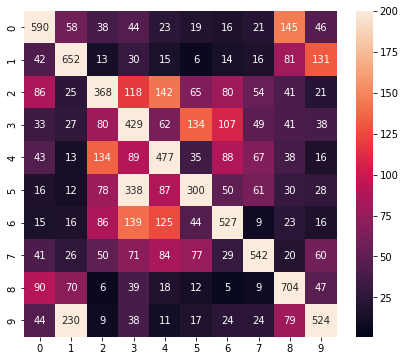

In [16]:
conf = confusion_matrix(Y_test_dense, preds)
plt.figure(figsize=(7,6))
sns.heatmap(conf, fmt='d', annot=True, vmin=1, vmax=200)

Please, analyize the results - which classess are missclassified to other classes? See the [CIFAR10 class list](https://keras.io/api/datasets/cifar10/) on the Keras page. 

## 3.2. Accuracy, Precision, Recall, F1
We can calculate these values based on the confusion matrix, or separately with function calls, or we can display all of them with one function.

In [17]:
print(accuracy_score(Y_test_dense, preds))
print(precision_score(Y_test_dense, preds, average='micro'))
print(precision_score(Y_test_dense, preds, average='macro'))
print(precision_score(Y_test_dense, preds, average='weighted'))
print(recall_score(Y_test_dense, preds, average='micro'))
print(recall_score(Y_test_dense, preds, average='macro'))
print(recall_score(Y_test_dense, preds, average='weighted'))
print(f1_score(Y_test_dense, preds, average='micro'))
print(f1_score(Y_test_dense, preds, average='macro'))
print(f1_score(Y_test_dense, preds, average='weighted'))


0.5113
0.5113
0.5143535746315764
0.5143535746315763
0.5113
0.5113
0.5113
0.5113
0.509491564965797
0.509491564965797


In [18]:
print(classification_report(np.argmax(Y_test,axis=1),preds))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      1000
           1       0.58      0.65      0.61      1000
           2       0.43      0.37      0.40      1000
           3       0.32      0.43      0.37      1000
           4       0.46      0.48      0.47      1000
           5       0.42      0.30      0.35      1000
           6       0.56      0.53      0.54      1000
           7       0.64      0.54      0.59      1000
           8       0.59      0.70      0.64      1000
           9       0.57      0.52      0.54      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



In [19]:
print(balanced_accuracy_score(np.argmax(Y_test,axis=1),preds))

0.5113


Indeed, it is the same as the standard accuracy score, because the test dataset is perfectly balanced (1000 samples per each class). 

## 3.3. ROC curve
ROC curves can be applied to binary classification problems, thus, we have to adjust the predictions of each class into a binary case.

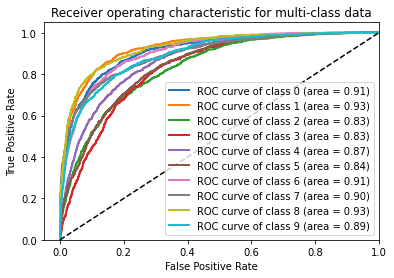

In [20]:
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(Y_test_dense))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=list(mcolors.TABLEAU_COLORS)[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
# source: https://stackoverflow.com/questions/37017400/sklearn-metrics-roc-curve-for-multiclass-classification

## 3.4. Prediction probabilities
As a next step, it helps us to understand the capabilities of a classifier by analizing the histogram of the predicted probabilties. we wil show the idea for one class, however, it can be extended to all classes.

We will evaluate the probabilities in a one-vs-rest manner, which means that we will select one class, and merge all other classess.

In [21]:
selected_class=7
Y_test_binary = Y_test_dense==selected_class
probas_binary = np.concatenate((np.sum(np.delete(probas,selected_class,axis=1),axis=1).reshape(-1,1), probas[:,selected_class].reshape(-1,1)), axis=1)

<Axes: ylabel='Count'>

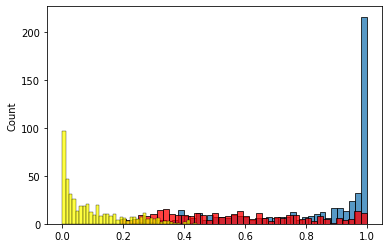

In [22]:
TP=(Y_test_dense == selected_class) & (preds == selected_class)
TN=(Y_test_dense != selected_class) & (preds != selected_class)
FP=(Y_test_dense != selected_class) & (preds == selected_class)
FN=(Y_test_dense == selected_class) & (preds != selected_class)

sns.histplot(probas_binary[TP,1], kde=False, bins=40)
sns.histplot(probas_binary[FP,1], kde=False, bins=40, color='red')
sns.histplot(probas_binary[FN,1], kde=False, bins=40, color='yellow')


What does this figure mean? Think about it!

We can also display the probability distribution of the target class of the TN cases:

<Axes: ylabel='Count'>

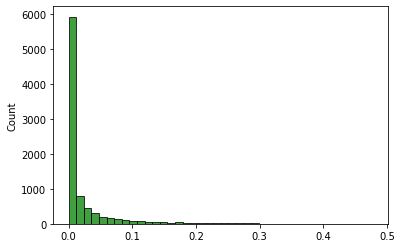

In [23]:
sns.histplot(probas_binary[TN,1], kde=False, bins=40, color='green')


## 3.5. Exercise
Select and display 10-10 images that belong to class 7 and

* 3.5.1. the same class was (correctly) predicted, with the highest probabilities 
* 3.5.2. a different class was (incorrectly) predicted, with the highest probabilities
* 3.5.3. the same class was (correctly) predicted, with the lowest probabilities
* 3.5.4. a different class was (incorrectly) predicted, with the lowest probabilities


### 3.5.1. solution

In [24]:
#X_test --- images
belongs_to_class_7 = Y_test_dense == 7
print(belongs_to_class_7)
print(belongs_to_class_7.shape)

[False False False ... False False  True]
(10000,)


In [25]:
class_7_predicted = preds==7

In [26]:
class_7_correctly_predicted = belongs_to_class_7 & class_7_predicted # === TP

In [27]:
imgs_correctly_predicted = (mean+std*X_test[class_7_correctly_predicted]).reshape(-1,32,32,3).astype(int)

In [28]:
# selecting highes probabilities
probas_class_7_correctly_predicted = probas[class_7_correctly_predicted]

In [29]:
probas_class_7_correctly_predicted_for_class_7_only = probas_class_7_correctly_predicted[:,7]

<Axes: ylabel='Count'>

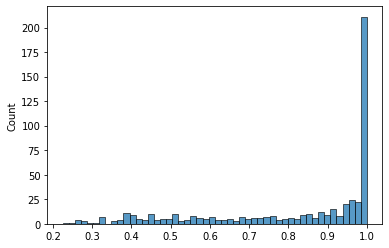

In [30]:
sns.histplot(probas_class_7_correctly_predicted_for_class_7_only, bins=50)

In [31]:
ind = np.argpartition(probas_class_7_correctly_predicted_for_class_7_only, -10)[-10:]

In [32]:
ind

array([337, 508,  99, 346, 112, 257, 397, 428, 523, 513])

In [33]:
probas_class_7_correctly_predicted_for_class_7_only[ind]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

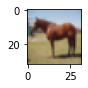

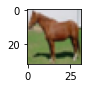

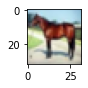

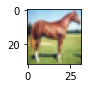

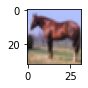

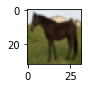

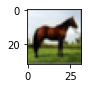

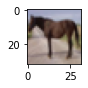

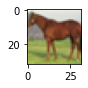

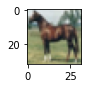

In [34]:
for i in ind:
  plt.figure(figsize=(1,1))
  plt.imshow(imgs_correctly_predicted[i])

### 3.5.2. solution

In [35]:
imgs_incorrectly_predicted = (mean+std*X_test[FN]).reshape(-1,32,32,3).astype(int)

In [36]:
imgs_incorrectly_predicted.shape

(458, 32, 32, 3)

In [37]:
# selecting highes probabilities
probas_class_7_incorrectly_predicted = probas[FN]

In [38]:
probas_class_7_incorrectly_predicted_for_class_7_only = probas_class_7_incorrectly_predicted[:,7]

<Axes: ylabel='Count'>

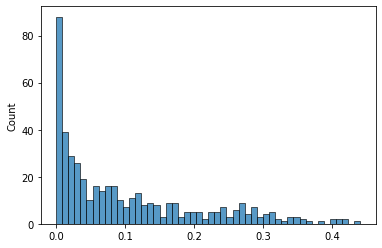

In [39]:
sns.histplot(probas_class_7_incorrectly_predicted_for_class_7_only, bins=50)

In [40]:
ind = np.argpartition(probas_class_7_incorrectly_predicted_for_class_7_only, -10)[-10:]

In [41]:
ind

array([178,  93, 442,  57, 438, 406, 188,  84, 211, 433])

In [42]:
probas_class_7_incorrectly_predicted_for_class_7_only[ind]

array([0.35767645, 0.3647858 , 0.40577325, 0.38471597, 0.4043158 ,
       0.41487825, 0.41100332, 0.41718632, 0.4185087 , 0.44142687],
      dtype=float32)

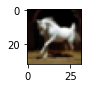

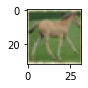

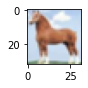

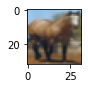

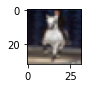

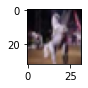

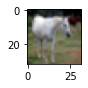

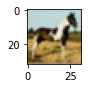

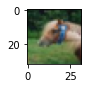

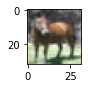

In [43]:
for i in ind:
  plt.figure(figsize=(1,1))
  plt.imshow(imgs_incorrectly_predicted[i])

### 3.5.3. solution

In [44]:
ind = np.argpartition(probas_class_7_correctly_predicted_for_class_7_only, -10)[:10]

In [45]:
ind

array([222, 541, 539,   3,   4, 537,   6,   7, 532,   9])

In [46]:
probas_class_7_correctly_predicted_for_class_7_only[ind]

array([0.36645505, 0.84196955, 0.4542614 , 0.4527934 , 0.83062357,
       0.77092737, 0.39350635, 0.70893764, 0.36479458, 0.7112639 ],
      dtype=float32)

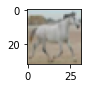

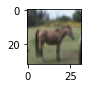

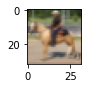

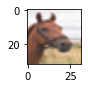

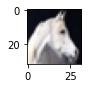

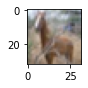

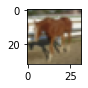

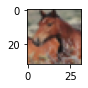

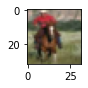

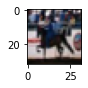

In [47]:
for i in ind:
  plt.figure(figsize=(1,1))
  plt.imshow(imgs_correctly_predicted[i])

### 3.5.4. solution

In [51]:
ind = np.argpartition(probas_class_7_incorrectly_predicted_for_class_7_only, -10)[:10]

In [52]:
ind

array([172, 457, 449,   3,   4, 443,   6,   7,   8, 441])

In [55]:
probas_class_7_incorrectly_predicted_for_class_7_only[ind]

array([4.9587293e-03, 2.9180301e-02, 4.2740167e-03, 8.0093181e-05,
       3.8634376e-03, 2.9654028e-02, 5.6436155e-03, 2.6570871e-02,
       2.9071298e-04, 8.2125459e-03], dtype=float32)

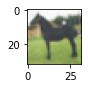

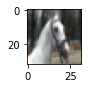

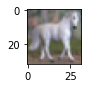

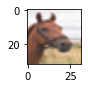

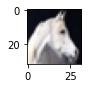

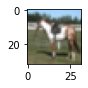

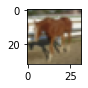

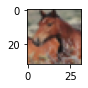

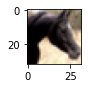

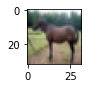

In [56]:
for i in ind:
  plt.figure(figsize=(1,1))
  plt.imshow(imgs_correctly_predicted[i])